## Quiz #0502

### "Human Activity Recognition" 

#### Answer the following questions by providing Python code:
#### Objectives:
- Carry out the EDA.
- Carry out the data pre-processing.
- Optimize and test a predictive model of your choice.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### Read in data:
The explanation on the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).

In [58]:
# Go to the directory where the data file is located. 
# os.chdir(r'~~')                # Please, replace the path with your own. 

In [59]:
df = pd.read_csv('data_human activity recognition.csv', header='infer')

In [60]:
df.shape

(19622, 160)

In [61]:
pd.set_option('display.max_rows',160)
pd.set_option('display.max_columns',160)

In [62]:
df.head()

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,kurtosis_yaw_belt,skewness_roll_belt,skewness_roll_belt.1,skewness_yaw_belt,max_roll_belt,max_picth_belt,max_yaw_belt,min_roll_belt,min_pitch_belt,min_yaw_belt,amplitude_roll_belt,amplitude_pitch_belt,amplitude_yaw_belt,var_total_accel_belt,avg_roll_belt,stddev_roll_belt,var_roll_belt,avg_pitch_belt,stddev_pitch_belt,var_pitch_belt,avg_yaw_belt,stddev_yaw_belt,var_yaw_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,var_accel_arm,avg_roll_arm,stddev_roll_arm,var_roll_arm,avg_pitch_arm,stddev_pitch_arm,var_pitch_arm,avg_yaw_arm,stddev_yaw_arm,var_yaw_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,kurtosis_roll_arm,kurtosis_picth_arm,kurtosis_yaw_arm,skewness_roll_arm,skewness_pitch_arm,skewness_yaw_arm,max_roll_arm,max_picth_arm,max_yaw_arm,min_roll_arm,min_pitch_arm,min_yaw_arm,amplitude_roll_arm,amplitude_pitch_arm,amplitude_yaw_arm,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,kurtosis_roll_dumbbell,kurtosis_picth_dumbbell,kurtosis_yaw_dumbbell,skewness_roll_dumbbell,skewness_pitch_dumbbell,skewness_yaw_dumbbell,max_roll_dumbbell,max_picth_dumbbell,max_yaw_dumbbell,min_roll_dumbbell,min_pitch_dumbbell,min_yaw_dumbbell,amplitude_roll_dumbbell,amplitude_pitch_dumbbell,amplitude_yaw_dumbbell,total_accel_dumbbell,var_accel_dumbbell,avg_roll_dumbbell,stddev_roll_dumbbell,var_roll_dumbbell,avg_pitch_dumbbell,stddev_pitch_dumbbell,var_pitch_dumbbell,avg_yaw_dumbbell,stddev_yaw_dumbbell,var_yaw_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,kurtosis_roll_forearm,kurtosis_picth_forearm,kurtosis_yaw_forearm,skewness_roll_forearm,skewness_pitch_forearm,skewness_yaw_forearm,max_roll_forearm,max_picth_forearm,max_yaw_forearm,min_roll_forearm,min_pitch_forearm,min_yaw_forearm,amplitude_roll_forearm,amplitude_pitch_forearm,amplitude_yaw_forearm,total_accel_forearm,var_accel_forearm,avg_roll_forearm,stddev_roll_forearm,var_roll_forearm,avg_pitch_forearm,stddev_pitch_forearm,var_pitch_forearm,avg_yaw_forearm,stddev_yaw_forearm,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,-0.02,-21,4,22,-3,599,-313,-128.0,22.5,-161.0,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,-0.02,-288,109,-123,-368,337,516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.052175,-70.494004,-84.873939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.02,0.00,-234,47,-271,-559,293,-65.0,28.4,-63.9,-153.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.00,-0.02,-22,4,22,-7,608,-311,-128.0,22.5,-161.0,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,-0.02,-0.02,-290,110,-125,-369,337,513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.130740,-70.637505,-84.710647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.02,0.00,-233,47,-269,-555,296,-64.0,28.3,-63.9,-153.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,NaN

In [63]:
df.dtypes.value_counts()

float64    94
object     37
int64      29
dtype: int64

1). Carry out the EDA. Check for the missing values. HINT: The response variable is 'classe'.

In [64]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

min_yaw_arm                 0.979309
kurtosis_yaw_dumbbell       0.979309
min_roll_arm                0.979309
min_pitch_arm               0.979309
var_total_accel_belt        0.979309
amplitude_roll_arm          0.979309
amplitude_pitch_arm         0.979309
amplitude_yaw_arm           0.979309
amplitude_yaw_belt          0.979309
amplitude_pitch_belt        0.979309
amplitude_roll_belt         0.979309
kurtosis_roll_dumbbell      0.979309
kurtosis_picth_dumbbell     0.979309
skewness_roll_dumbbell      0.979309
max_picth_arm               0.979309
skewness_pitch_dumbbell     0.979309
skewness_yaw_dumbbell       0.979309
max_roll_dumbbell           0.979309
max_picth_dumbbell          0.979309
max_yaw_dumbbell            0.979309
min_roll_dumbbell           0.979309
min_pitch_dumbbell          0.979309
min_yaw_dumbbell            0.979309
amplitude_roll_dumbbell     0.979309
amplitude_pitch_dumbbell    0.979309
amplitude_yaw_dumbbell      0.979309
max_yaw_arm                 0.979309
m

2). Get rid of the columns that have more than 97% missing values.

In [65]:
#columns that have more than 97% missing values
cols=df.columns[df.isnull().sum()/df.shape[0]>0.97]
cols.shape

(100,)

In [66]:
df.drop(cols,inplace=True,axis=1)

In [67]:
df.head()

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,total_accel_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,3,0.00,0.00,-0.02,-21,4,22,-3,599,-313,-128.0,22.5,-161.0,34,0.00,0.00,-0.02,-288,109,-123,-368,337,516,13.052175,-70.494004,-84.873939,37,0.0,-0.02,0.00,-234,47,-271,-559,293,-65.0,28.4,-63.9,-153.0,36,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,3,0.02,0.00,-0.02,-22,4,22,-7,608,-311,-128.0,22.5,-161.0,34,0.02,-0.02,-0.02,-290,110,-125,-369,337,513,13.130740,-70.637505,-84.710647,37,0.0,-0.02,0.00,-233,47,-269,-555,296,-64.0,28.3,-63.9,-153.0,36,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,3,0.00,0.00,-0.02,-20,5,23,-2,600,-305,-128.0,22.5,-161.0,34,0.02,-0.02,-0.02,-289,110,-126,-368,344,513,12.850750,-70.278120,-85.140781,37,0.0,-0.02,0.00,-232,46,-270,-561,298,-63.0,28.3,-63.9,-152.0,36,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,3,0.02,0.00,-0.03,-22,3,21,-6,604,-310,-128.0,22.1,-161.0,34,0.02,-0.03,0.02,-289,111,-123,-372,344,512,13.431200,-70.393795,-84.873626,37,0.0,-0.02,-0.02,-232,48,-269,-552,303,-60.0,28.1,-63.9,-152.0,36,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,3,0.02,0.02,-0.02,-21,2,24,-6,600,-302,-128.0,22.1,-161.0,34,0.00,-0.03,0.00,-289,111,-123,-374,337,506,13.378716,-70.428560,-84.853057,37,0.0,-0.02,0.00,-233,48,-270,-554,292,-68.0,28.0,-63.9,-152.0,36,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


In [68]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [69]:
df.columns

Index(['user_name', 'raw_timestamp_part_1', 'raw_timestamp_part_2',
       'cvtd_timestamp', 'new_window', 'num_window', 'roll_belt', 'pitch_belt',
       'yaw_belt', 'total_accel_belt', 'gyros_belt_x', 'gyros_belt_y',
       'gyros_belt_z', 'accel_belt_x', 'accel_belt_y', 'accel_belt_z',
       'magnet_belt_x', 'magnet_belt_y', 'magnet_belt_z', 'roll_arm',
       'pitch_arm', 'yaw_arm', 'total_accel_arm', 'gyros_arm_x', 'gyros_arm_y',
       'gyros_arm_z', 'accel_arm_x', 'accel_arm_y', 'accel_arm_z',
       'magnet_arm_x', 'magnet_arm_y', 'magnet_arm_z', 'roll_dumbbell',
       'pitch_dumbbell', 'yaw_dumbbell', 'total_accel_dumbbell',
       'gyros_dumbbell_x', 'gyros_dumbbell_y', 'gyros_dumbbell_z',
       'accel_dumbbell_x', 'accel_dumbbell_y', 'accel_dumbbell_z',
       'magnet_dumbbell_x', 'magnet_dumbbell_y', 'magnet_dumbbell_z',
       'roll_forearm', 'pitch_forearm', 'yaw_forearm', 'total_accel_forearm',
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'ac

3). Get rid of the unnecessary columns. HINT: Those columns with "time" in the name and those that are obviously unnecessary.

In [70]:
       # <Your code goes in here>
df.drop(df.columns[:4],axis=1,inplace=True)

In [71]:
df.head()

,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,total_accel_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,no,11,1.41,8.07,-94.4,3,0.00,0.00,-0.02,-21,4,22,-3,599,-313,-128.0,22.5,-161.0,34,0.00,0.00,-0.02,-288,109,-123,-368,337,516,13.052175,-70.494004,-84.873939,37,0.0,-0.02,0.00,-234,47,-271,-559,293,-65.0,28.4,-63.9,-153.0,36,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,no,11,1.41,8.07,-94.4,3,0.02,0.00,-0.02,-22,4,22,-7,608,-311,-128.0,22.5,-161.0,34,0.02,-0.02,-0.02,-290,110,-125,-369,337,513,13.130740,-70.637505,-84.710647,37,0.0,-0.02,0.00,-233,47,-269,-555,296,-64.0,28.3,-63.9,-153.0,36,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,no,11,1.42,8.07,-94.4,3,0.00,0.00,-0.02,-20,5,23,-2,600,-305,-128.0,22.5,-161.0,34,0.02,-0.02,-0.02,-289,110,-126,-368,344,513,12.850750,-70.278120,-85.140781,37,0.0,-0.02,0.00,-232,46,-270,-561,298,-63.0,28.3,-63.9,-152.0,36,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,no,12,1.48,8.05,-94.4,3,0.02,0.00,-0.03,-22,3,21,-6,604,-310,-128.0,22.1,-161.0,34,0.02,-0.03,0.02,-289,111,-123,-372,344,512,13.431200,-70.393795,-84.873626,37,0.0,-0.02,-0.02,-232,48,-269,-552,303,-60.0,28.1,-63.9,-152.0,36,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,no,12,1.48,8.07,-94.4,3,0.02,0.02,-0.02,-21,2,24,-6,600,-302,-128.0,22.1,-161.0,34,0.00,-0.03,0.00,-289,111,-123,-374,337,506,13.378716,-70.428560,-84.853057,37,0.0,-0.02,0.00,-233,48,-270,-554,292,-68.0,28.0,-63.9,-152.0,36,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


In [72]:
df.dtypes.value_counts()

float64    27
int64      26
object      2
dtype: int64

To understand the importance of each feature, let's go through some data visualization : 

4). Label encode the responde variable. HINT: use preprocessing.LabelEncoder(). 

In [73]:
df['classe'].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [74]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['classe']=le.fit_transform(df['classe'])

In [75]:
df['classe']

0        0
1        0
2        0
3        0
4        0
        ..
19617    4
19618    4
19619    4
19620    4
19621    4
Name: classe, Length: 19622, dtype: int64

5). Carry out min-max scaling of the exploratory variables. HINT: use preprocessing.MinMaxScaler().

In [76]:
df.dtypes

new_window               object
num_window                int64
roll_belt               float64
pitch_belt              float64
yaw_belt                float64
total_accel_belt          int64
gyros_belt_x            float64
gyros_belt_y            float64
gyros_belt_z            float64
accel_belt_x              int64
accel_belt_y              int64
accel_belt_z              int64
magnet_belt_x             int64
magnet_belt_y             int64
magnet_belt_z             int64
roll_arm                float64
pitch_arm               float64
yaw_arm                 float64
total_accel_arm           int64
gyros_arm_x             float64
gyros_arm_y             float64
gyros_arm_z             float64
accel_arm_x               int64
accel_arm_y               int64
accel_arm_z               int64
magnet_arm_x              int64
magnet_arm_y              int64
magnet_arm_z              int64
roll_dumbbell           float64
pitch_dumbbell          float64
yaw_dumbbell            float64
total_ac

In [77]:
df.select_dtypes(exclude='object').columns

Index(['num_window', 'roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y',
      

In [79]:
       # <Your code goes in here>
from sklearn.preprocessing import MinMaxScaler
for col in df.drop('classe',axis=1).select_dtypes(exclude='object').columns:
  scaler=MinMaxScaler()
  df[col]=scaler.fit_transform(np.array(df[col]).reshape(-1,1))
df.head()

,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,total_accel_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,no,0.011587,0.158774,0.550129,0.23844,0.103448,0.319018,0.500000,0.467532,0.482927,0.313305,0.781579,0.091248,0.768025,0.338428,0.144444,0.627750,0.052778,0.507692,0.566726,0.547771,0.431776,0.137931,0.682109,0.552802,0.158126,0.747692,0.862122,0.542753,0.264551,0.215802,0.637931,0.989235,0.038447,0.007452,0.282875,0.468254,0.096626,0.068016,0.919679,0.275910,0.578889,0.052988,0.075000,0.333333,0.848286,0.022074,0.033753,0.707692,0.536977,0.313433,0.647029,0.652357,0.702375,0
1,no,0.011587,0.158774,0.550129,0.23844,0.103448,0.325153,0.500000,0.467532,0.478049,0.313305,0.781579,0.083799,0.796238,0.340611,0.144444,0.627750,0.052778,0.507692,0.568505,0.544586,0.431776,0.135553,0.683706,0.550647,0.157394,0.747692,0.859799,0.543009,0.264071,0.216336,0.637931,0.989235,0.038447,0.007452,0.284404,0.468254,0.099693,0.071255,0.920387,0.277311,0.578611,0.052988,0.075000,0.333333,0.847901,0.022074,0.033753,0.707692,0.536977,0.312076,0.646516,0.655303,0.700921,0
2,no,0.011587,0.158827,0.550129,0.23844,0.103448,0.319018,0.500000,0.467532,0.487805,0.317597,0.784211,0.093110,0.771160,0.347162,0.144444,0.627750,0.052778,0.507692,0.568505,0.544586,0.431776,0.136742,0.683706,0.549569,0.158126,0.754872,0.859799,0.542097,0.265273,0.214929,0.637931,0.989235,0.038447,0.007452,0.285933,0.466270,0.098160,0.066397,0.920860,0.278711,0.578611,0.052988,0.077778,0.333333,0.848286,0.022011,0.033837,0.711795,0.537621,0.316147,0.646516,0.654040,0.698982,0
3,no,0.012746,0.159141,0.549957,0.23844,0.103448,0.325153,0.500000,0.464286,0.478049,0.309013,0.778947,0.085661,0.783699,0.341703,0.144444,0.625494,0.052778,0.507692,0.568505,0.542994,0.439252,0.136742,0.685304,0.552802,0.155198,0.754872,0.859024,0.543987,0.264886,0.215803,0.637931,0.989235,0.038447,0.007389,0.285933,0.470238,0.099693,0.073684,0.922041,0.282913,0.578056,0.052988,0.077778,0.333333,0.847901,0.022011,0.033837,0.704615,0.538907,0.314790,0.647541,0.654040,0.698982,0
4,no,0.012746,0.159141,0.550129,0.23844,0.103448,0.325153,0.515625,0.467532,0.482927,0.304721,0.786842,0.085661,0.771160,0.350437,0.144444,0.625494,0.052778,0.507692,0.566726,0.542994,0.435514,0.136742,0.685304,0.552802,0.153734,0.747692,0.854376,0.543816,0.264770,0.215870,0.637931,0.989235,0.038447,0.007452,0.284404,0.470238,0.098160,0.072065,0.919442,0.271709,0.577778,0.052988,0.077778,0.333333,0.847901,0.022074,0.033753,0.704615,0.538907,0.314790,0.647029,0.652778,0.700921,0


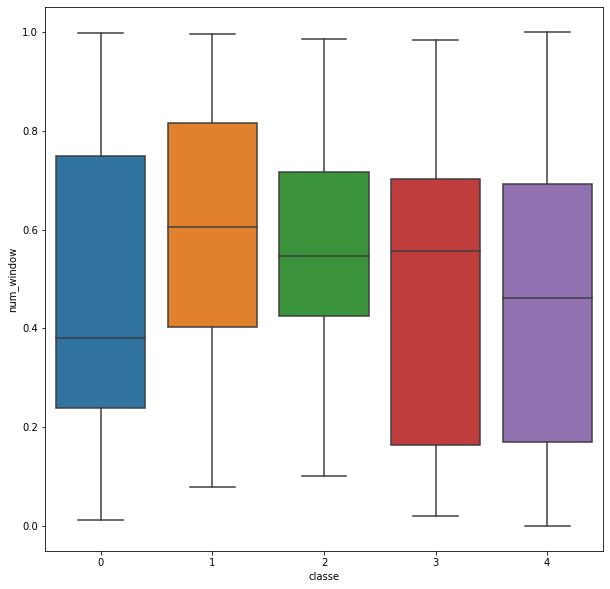

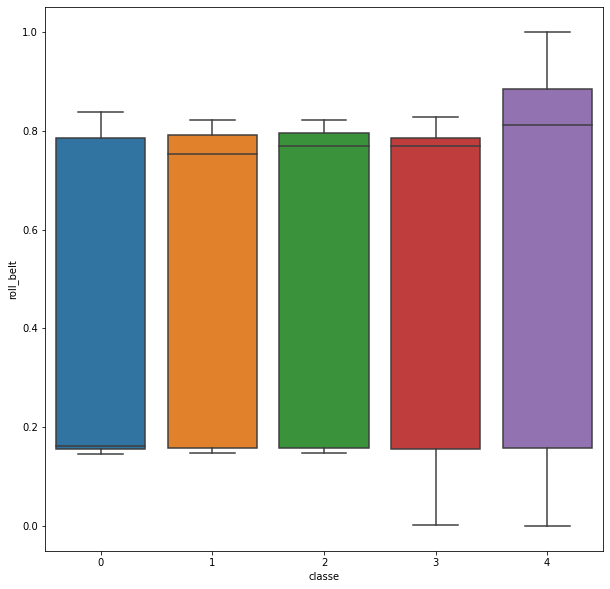

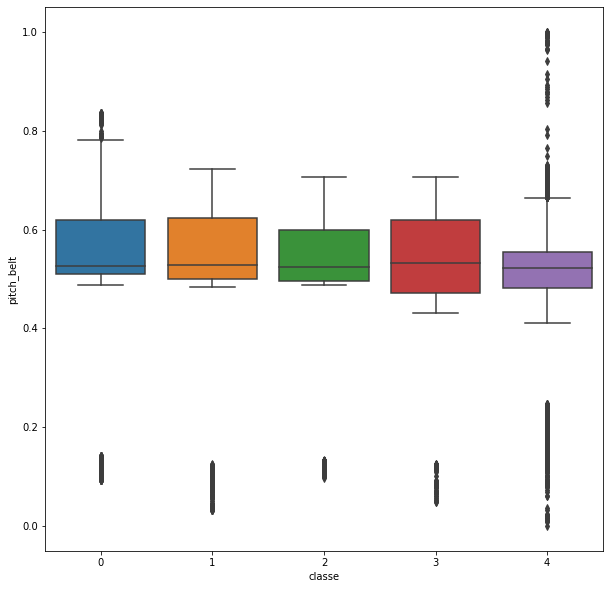

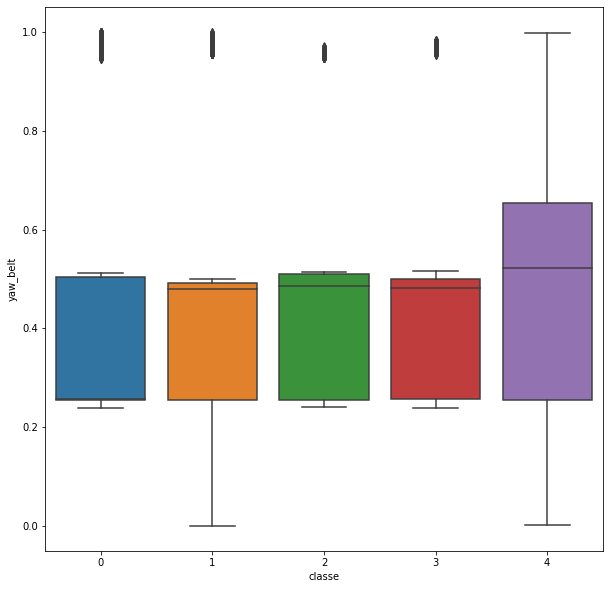

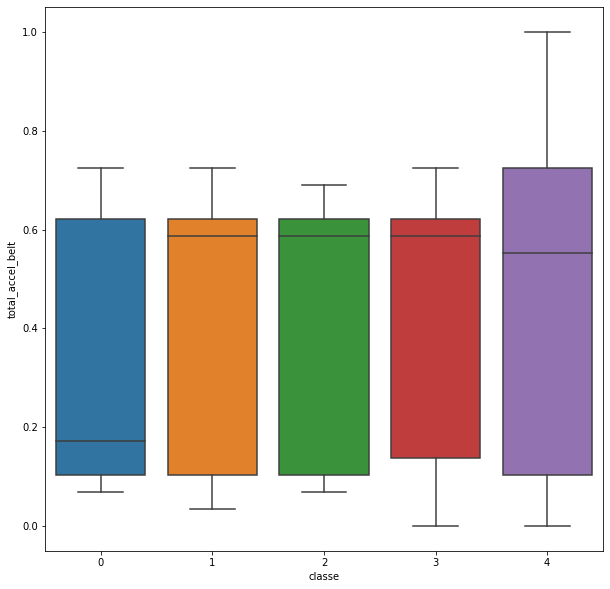

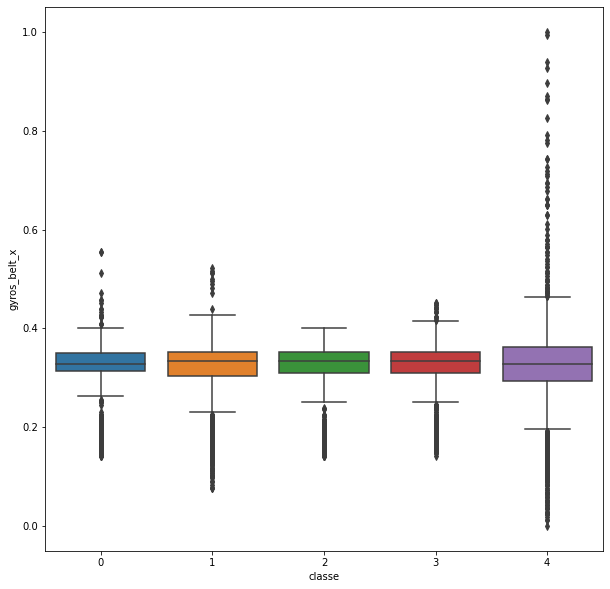

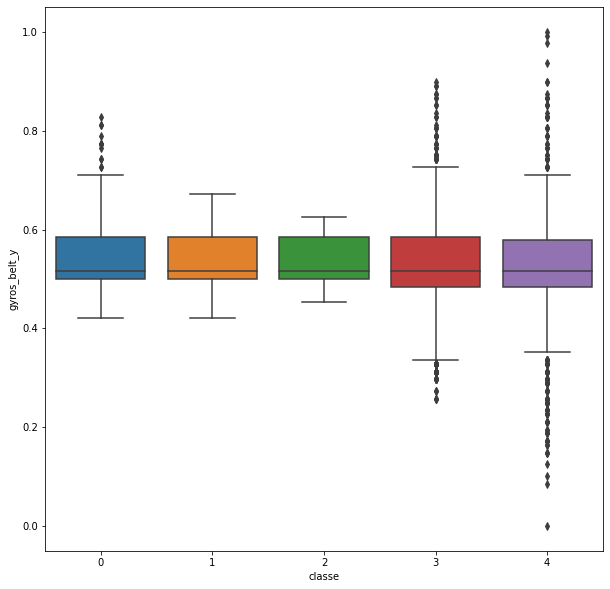

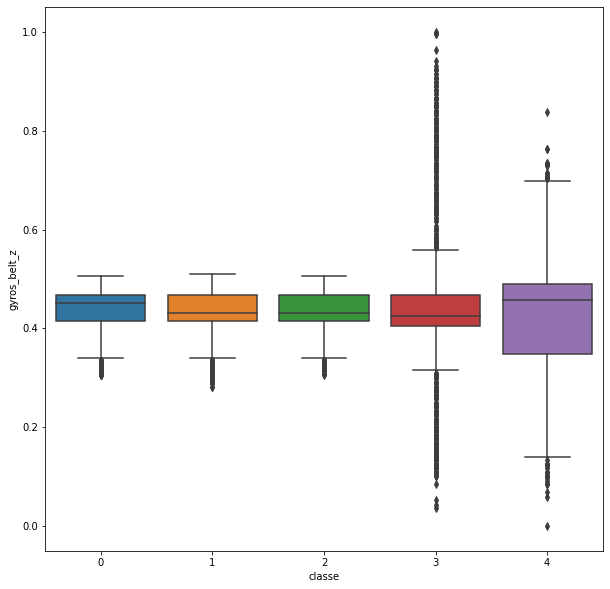

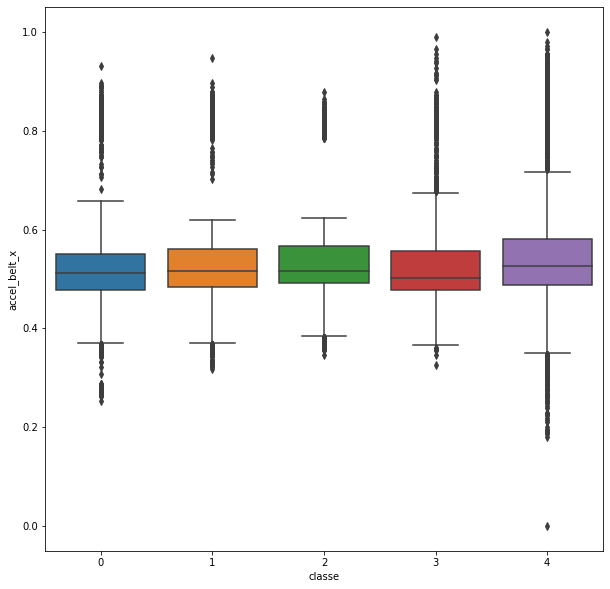

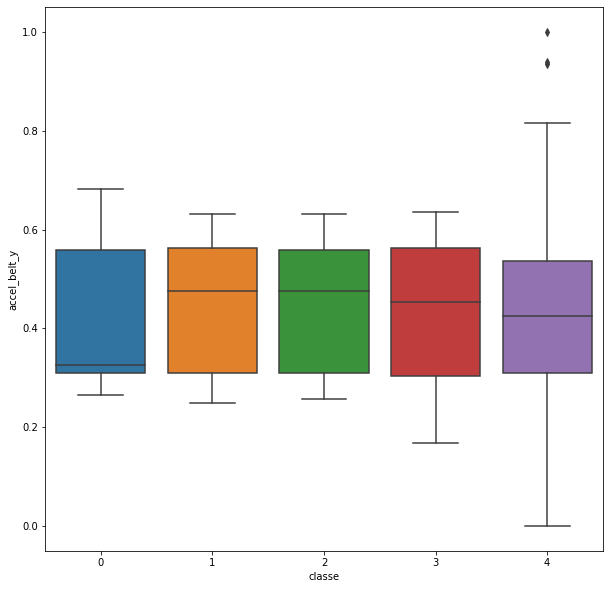

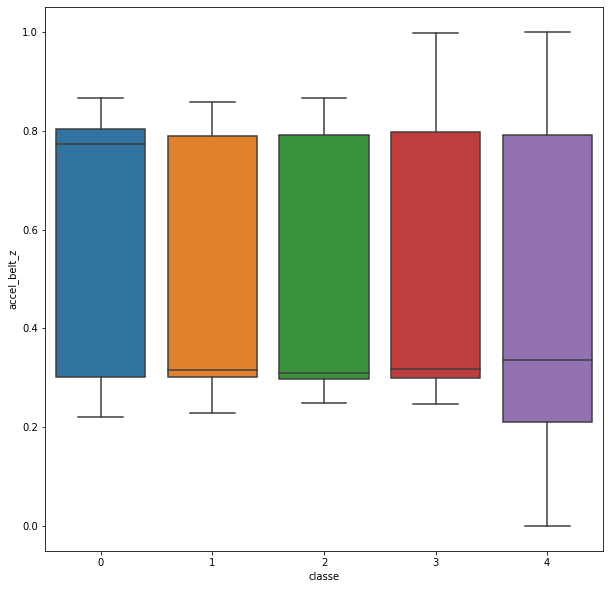

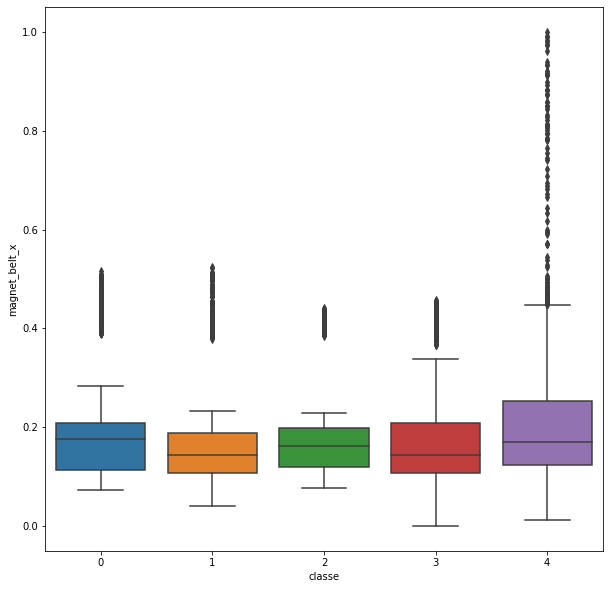

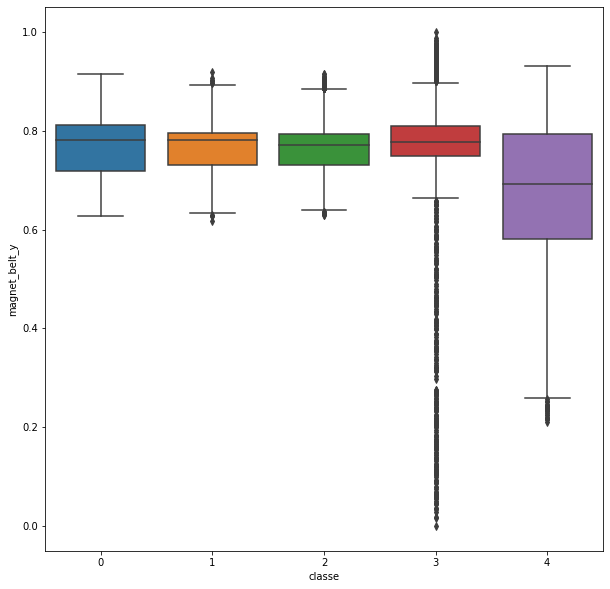

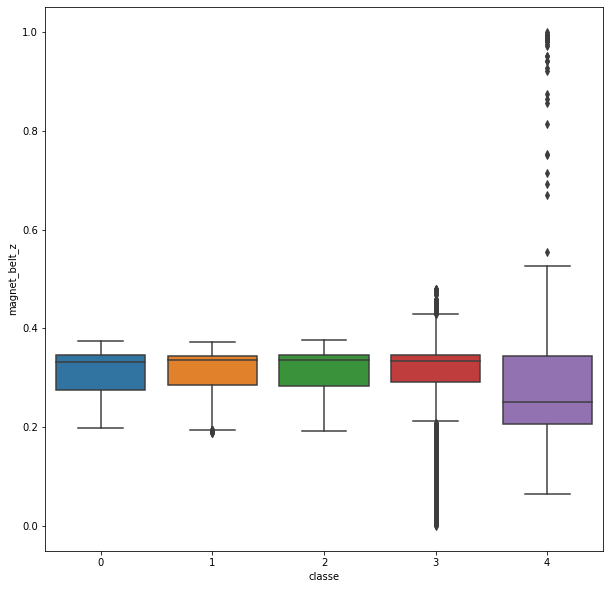

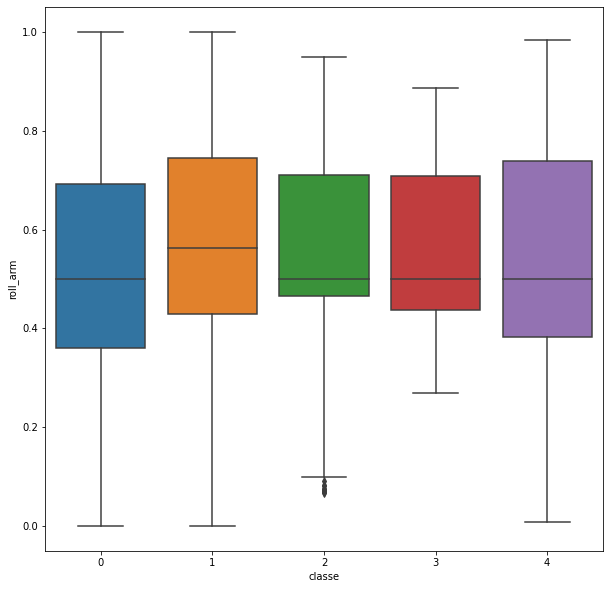

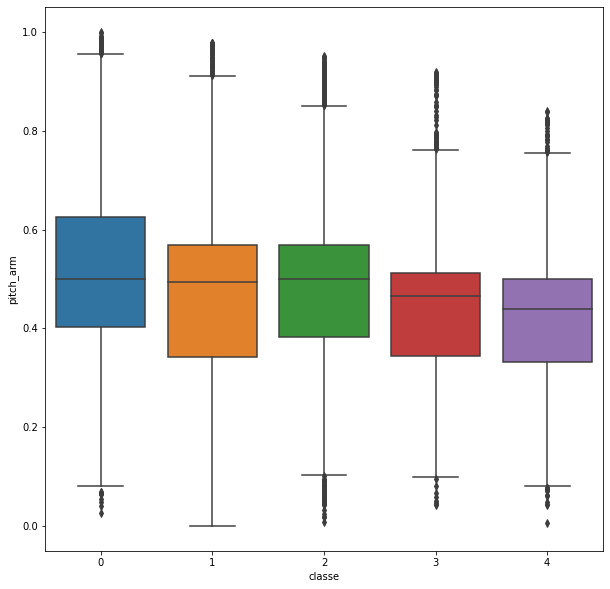

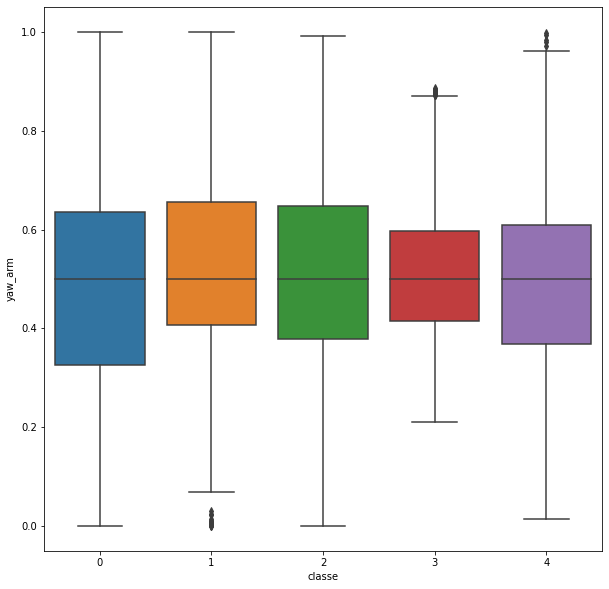

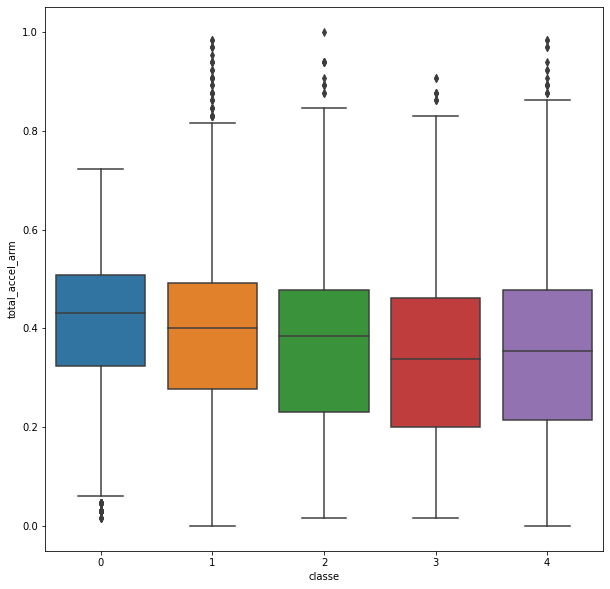

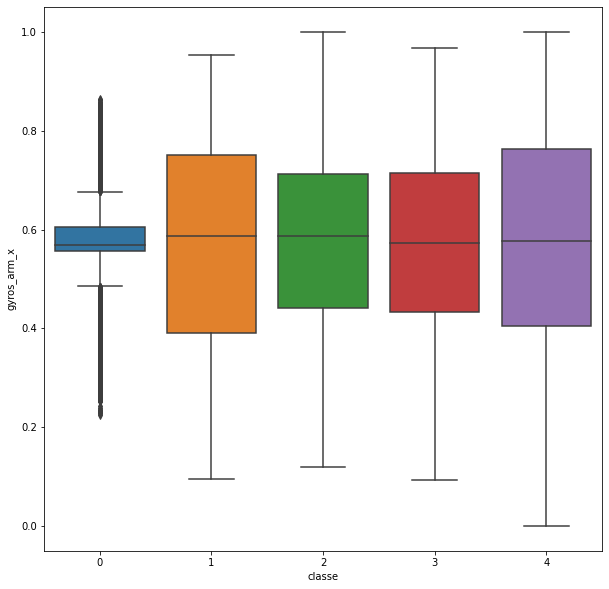

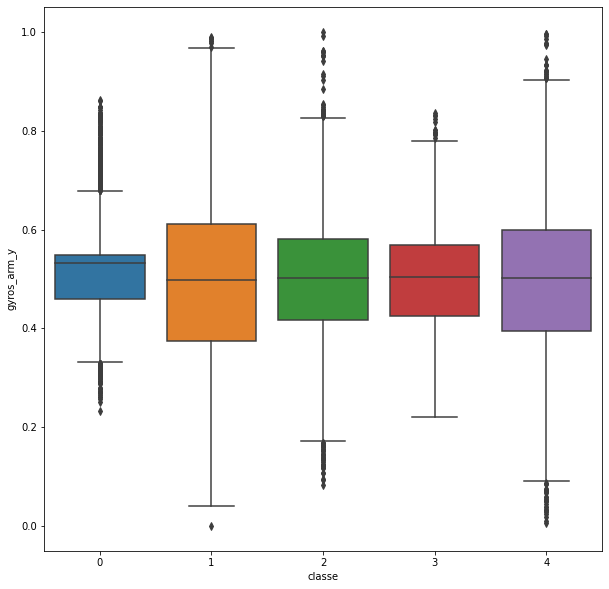

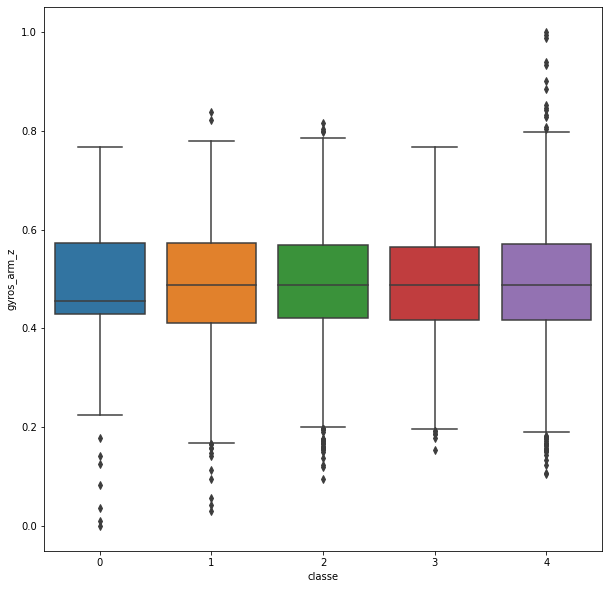

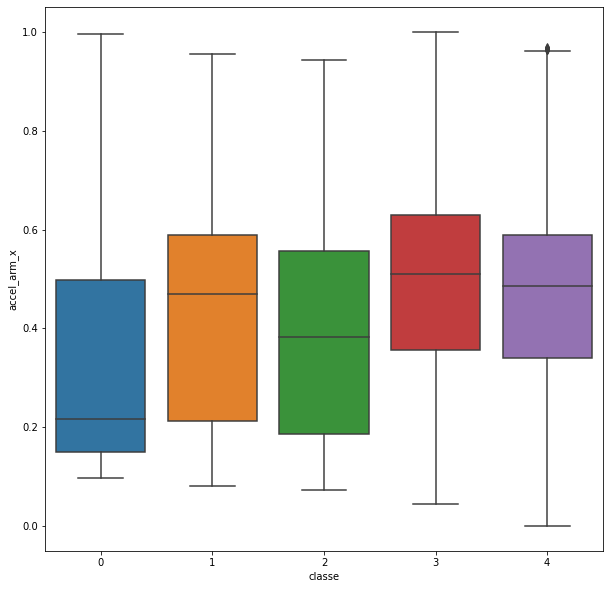

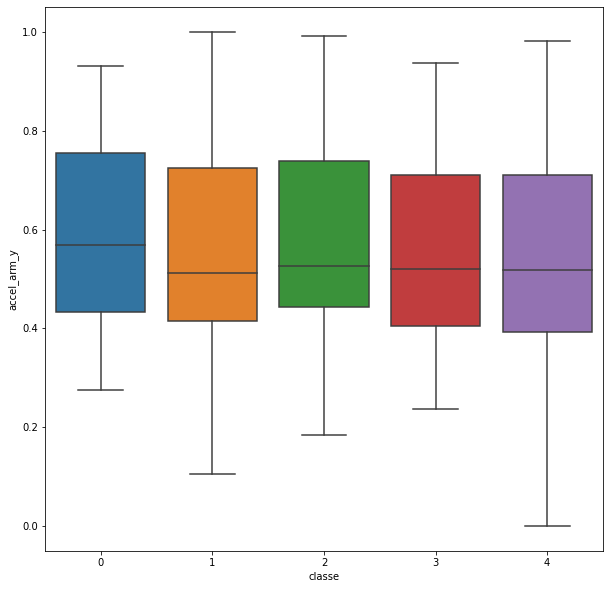

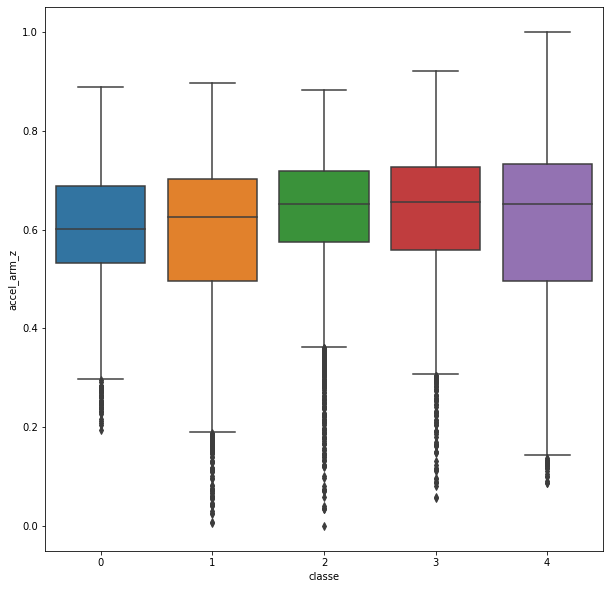

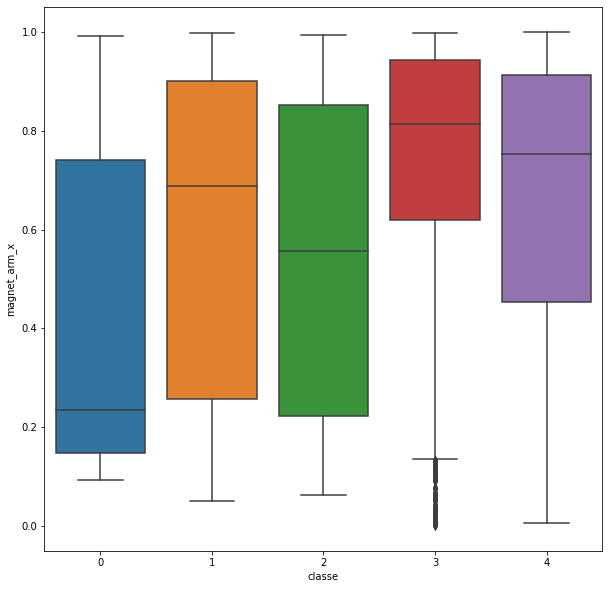

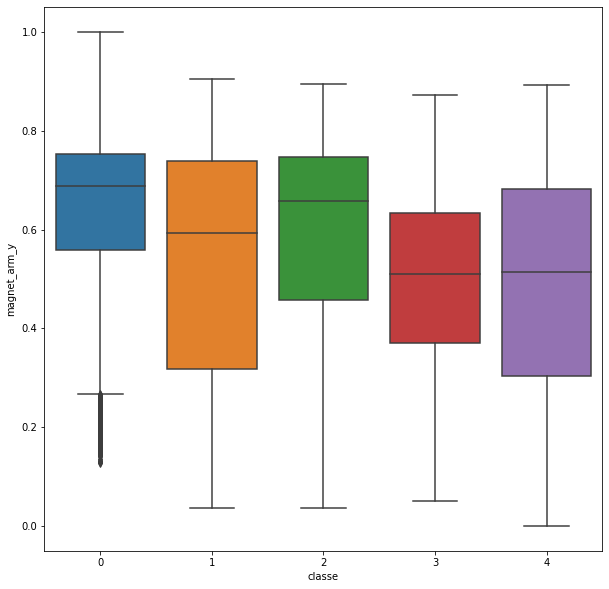

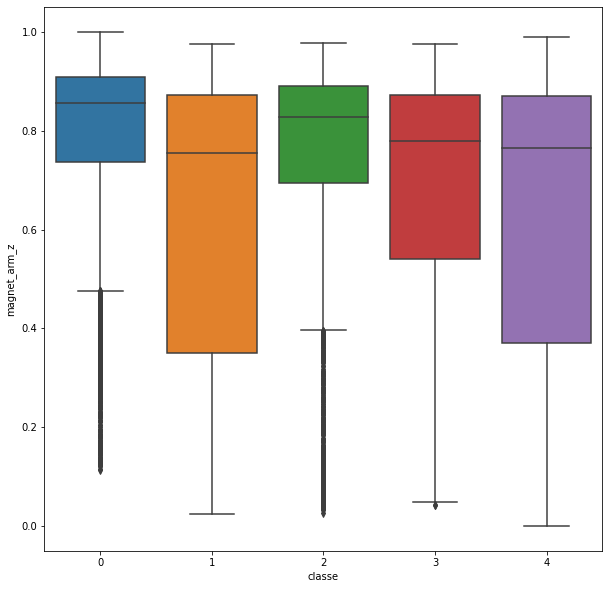

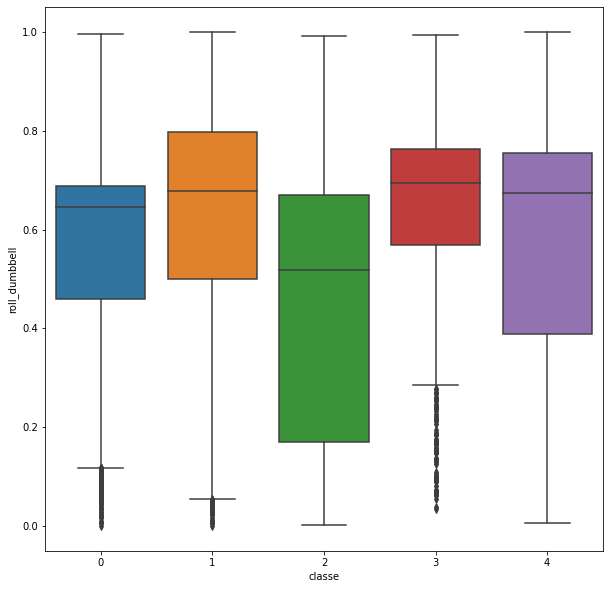

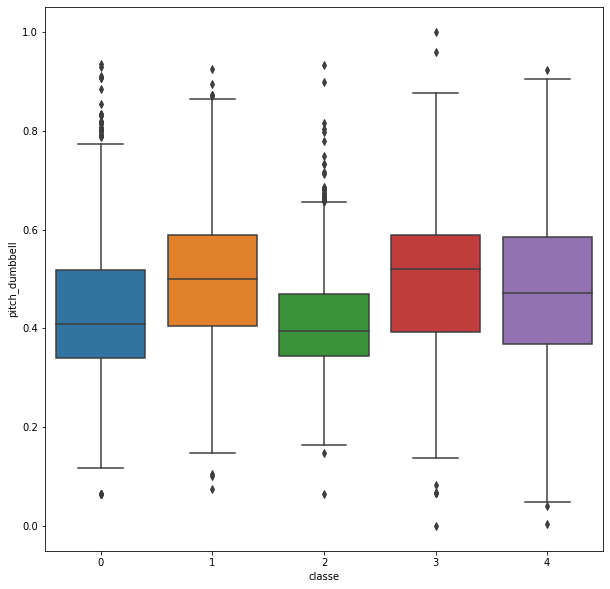

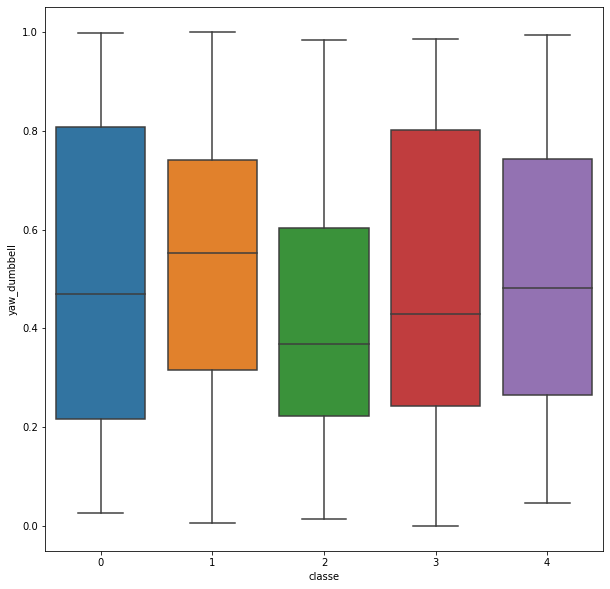

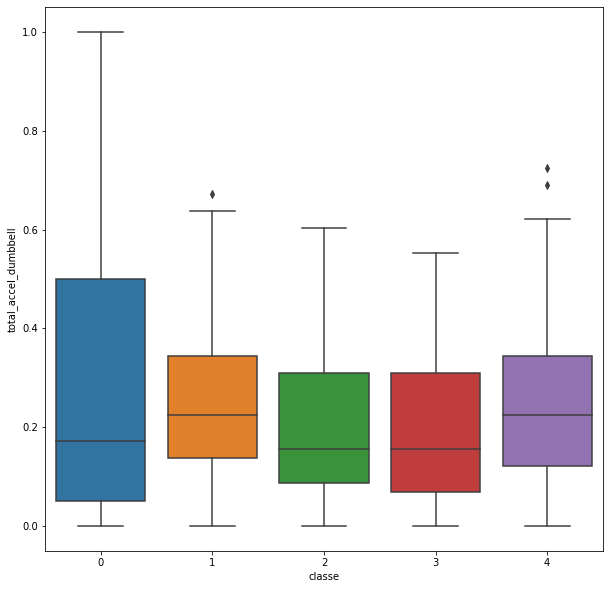

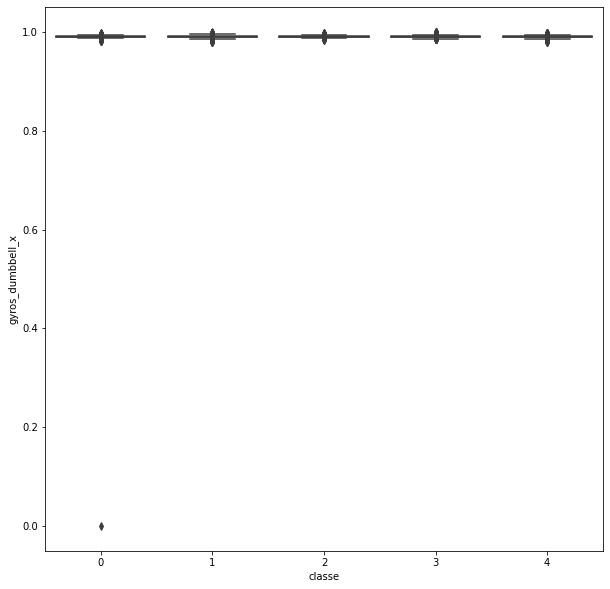

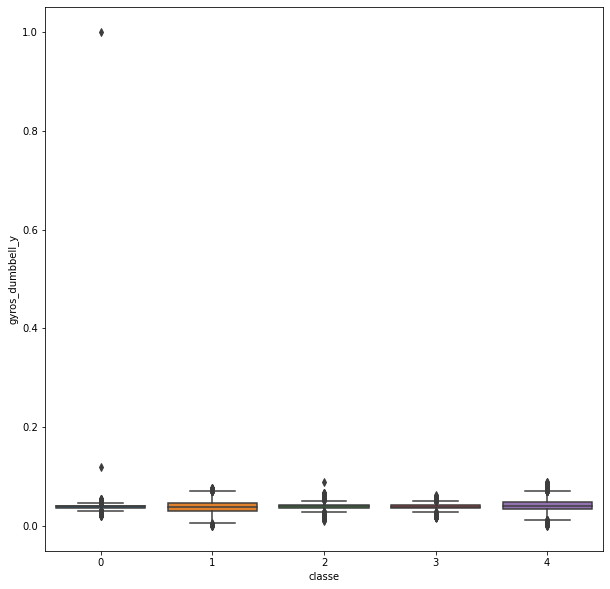

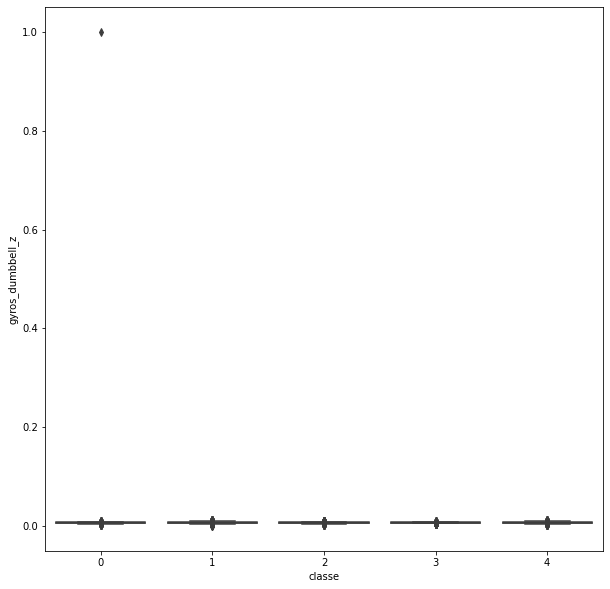

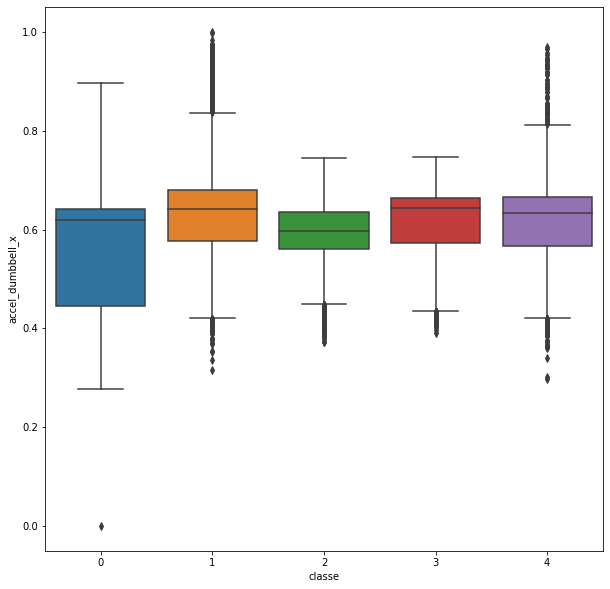

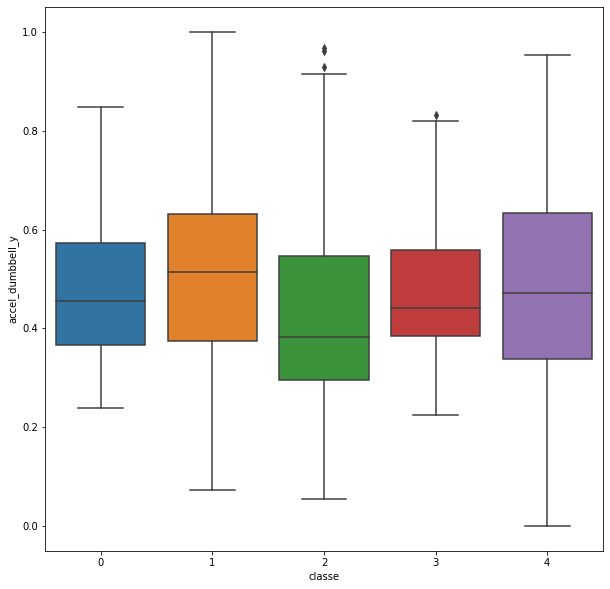

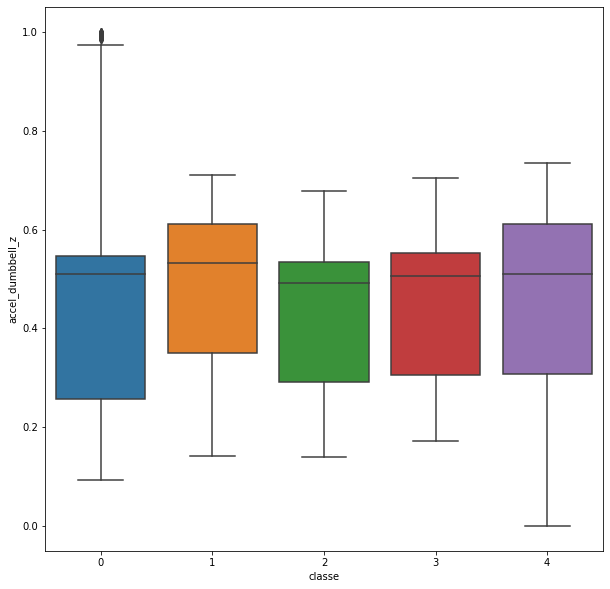

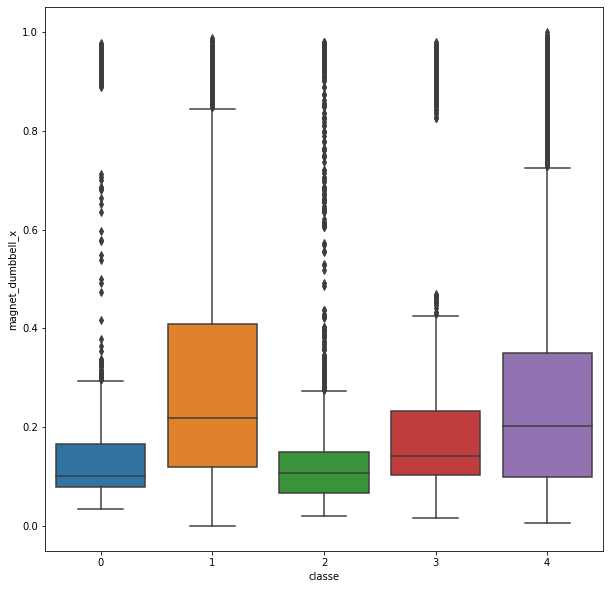

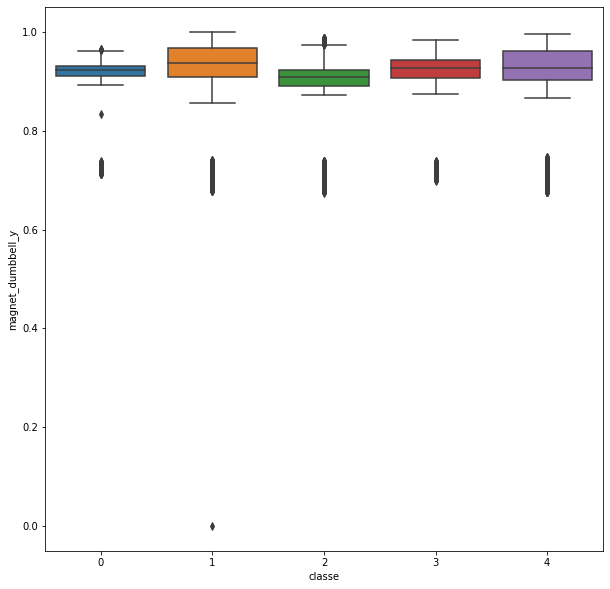

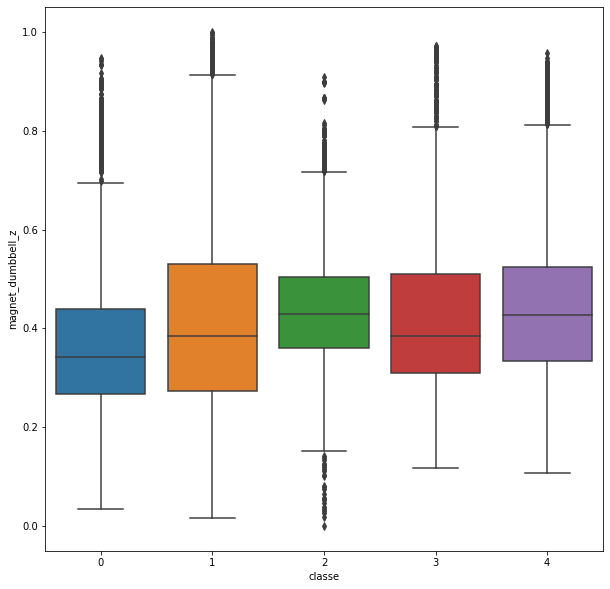

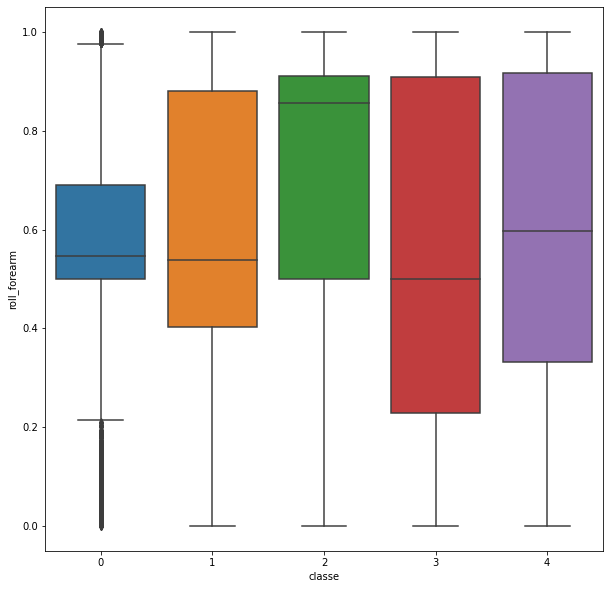

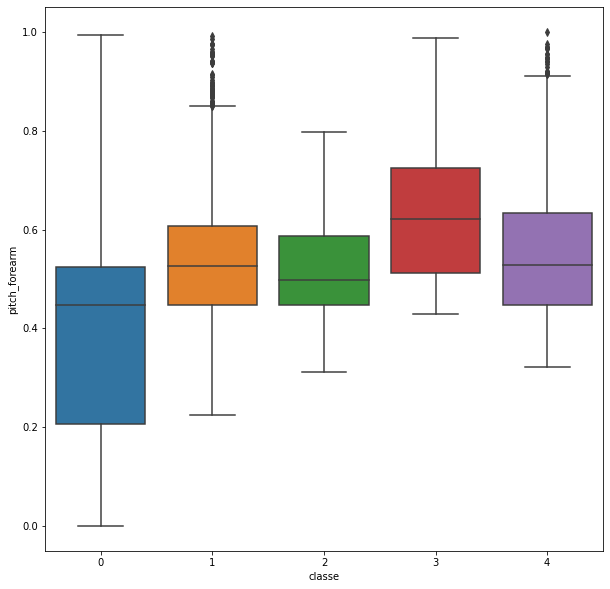

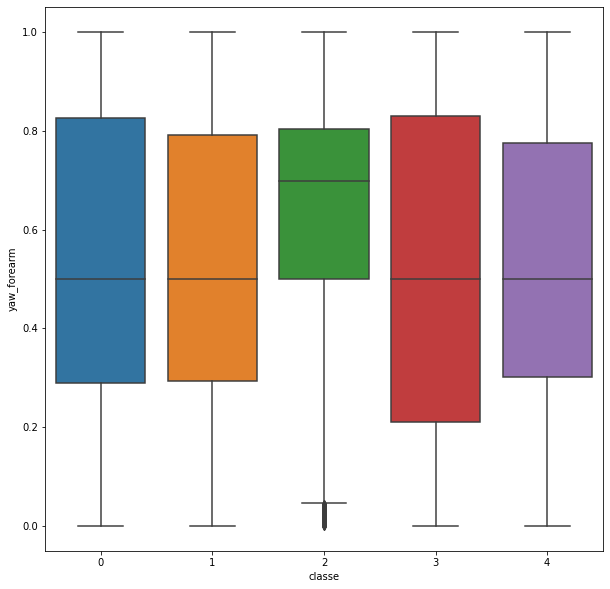

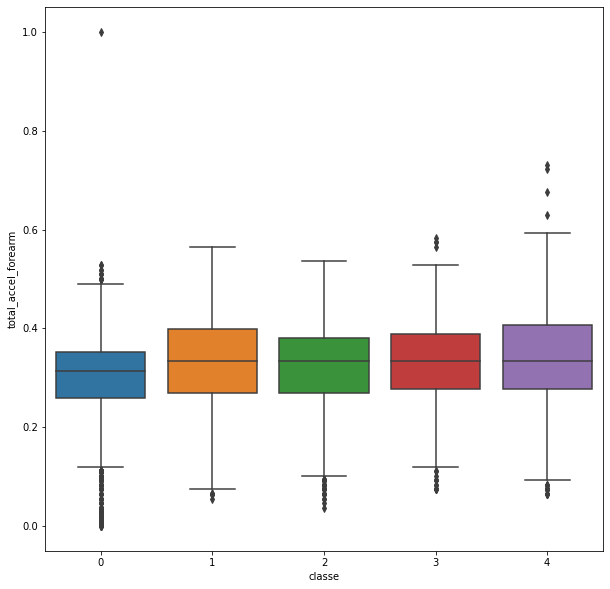

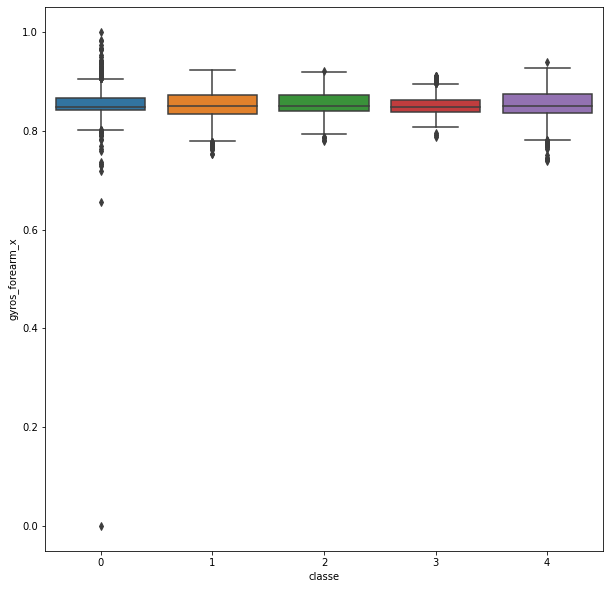

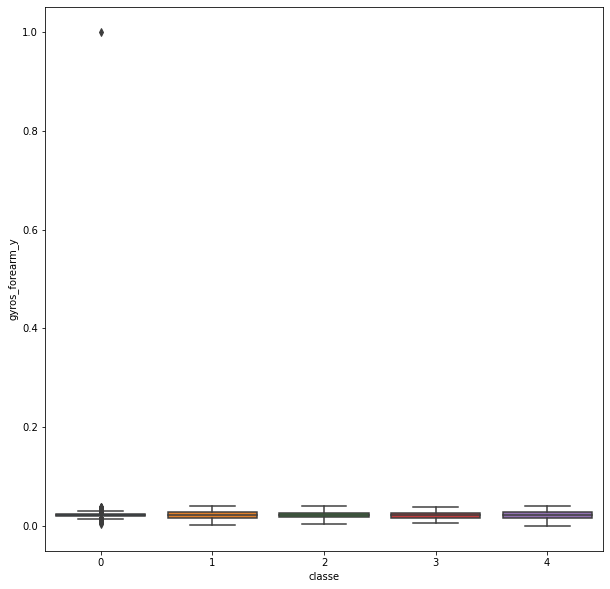

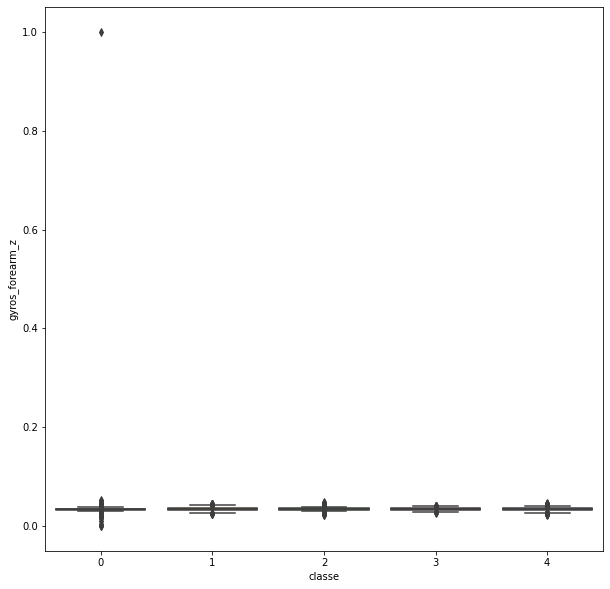

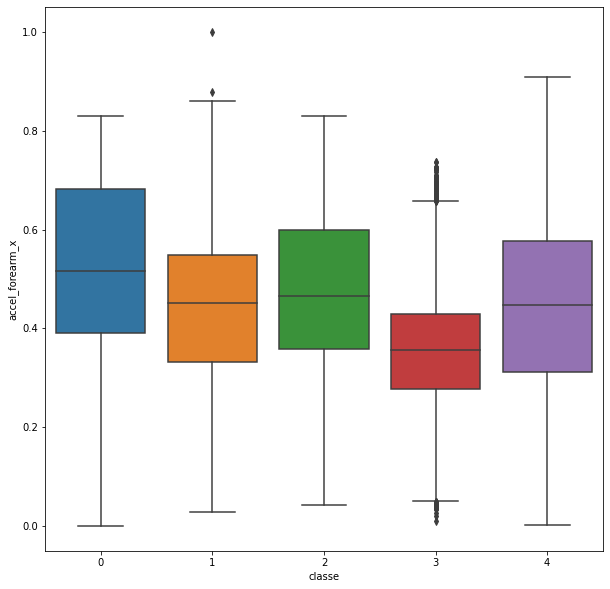

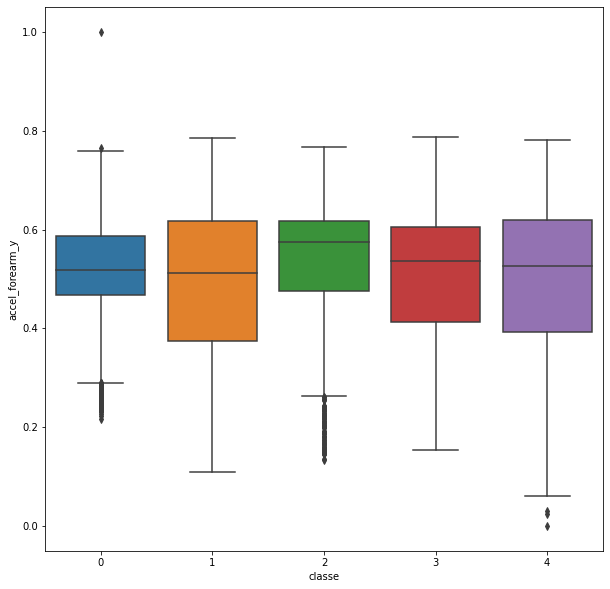

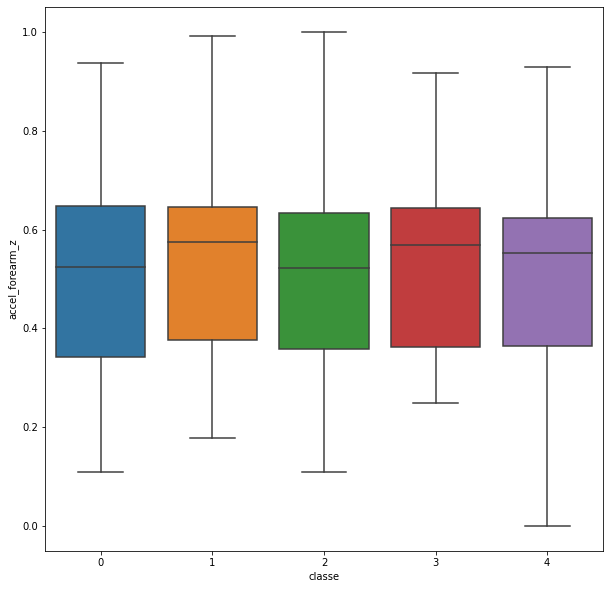

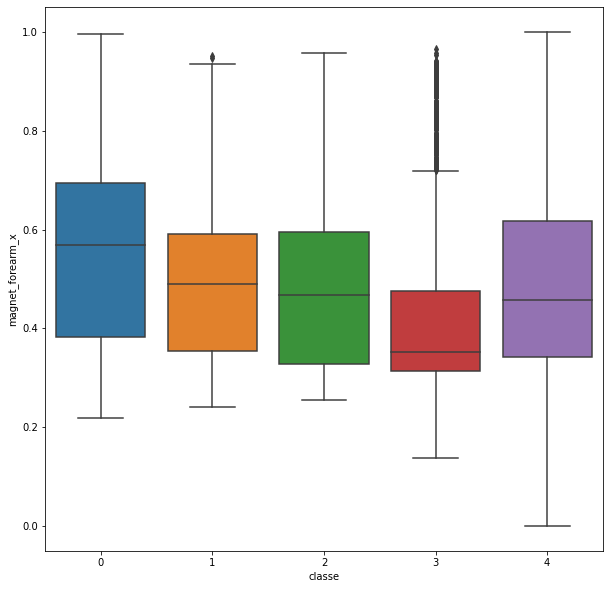

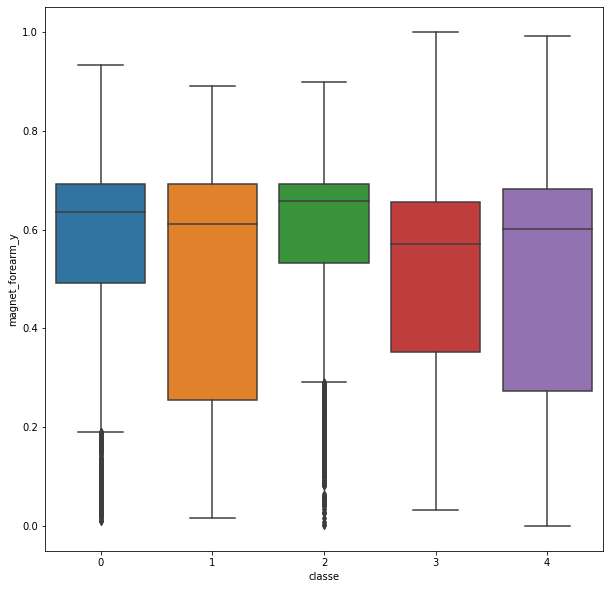

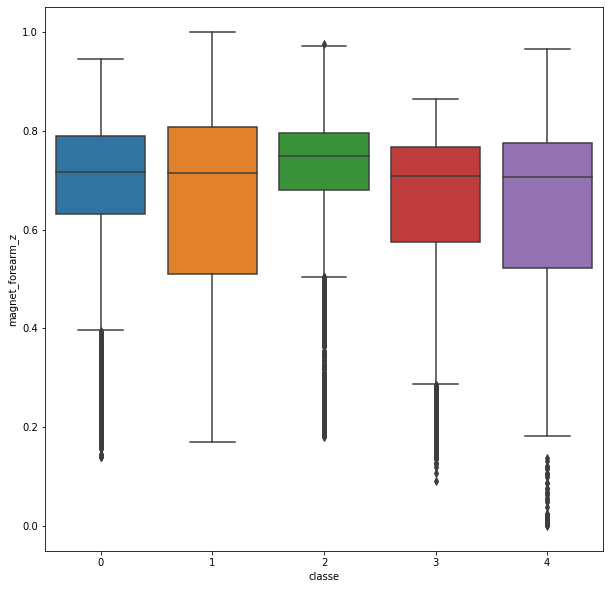

In [80]:
for col in df.select_dtypes('float').columns:
  plt.figure(figsize=(10,10))
  sns.boxplot(x='classe',y=col,data=df)


Interesting features : 
- roll_belt : class 0 has a median<0.2 whereas other classes have medians of around 0.8
-yaw_belt : class 0 has a median of 0.3, other classes 0.5
-total_accel_belt: median of 0.2 for class 0, 0.6 for others
-accel_belt_y
-accel_belt_z
-magnet_belt_z : class 4 has  a lower median than all others, others have a similar distrib
-accel_arm_x
-magnet_arm_x
-roll_dumbell
-pitch_dumbell
-roll_forearm
-pitch_forearm
-yaw_forearm : to distinguish class 2
-magnet_forearm
we'll select these features as they seem to cause the variance between classes

In [81]:
df.columns

Index(['new_window', 'num_window', 'roll_belt', 'pitch_belt', 'yaw_belt',
       'total_accel_belt', 'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z',
       'accel_belt_x', 'accel_belt_y', 'accel_belt_z', 'magnet_belt_x',
       'magnet_belt_y', 'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm',
       'total_accel_arm', 'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z',
       'accel_arm_x', 'accel_arm_y', 'accel_arm_z', 'magnet_arm_x',
       'magnet_arm_y', 'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell',
       'yaw_dumbbell', 'total_accel_dumbbell', 'gyros_dumbbell_x',
       'gyros_dumbbell_y', 'gyros_dumbbell_z', 'accel_dumbbell_x',
       'accel_dumbbell_y', 'accel_dumbbell_z', 'magnet_dumbbell_x',
       'magnet_dumbbell_y', 'magnet_dumbbell_z', 'roll_forearm',
       'pitch_forearm', 'yaw_forearm', 'total_accel_forearm',
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z',
       'magnet_forearm_x', 'magn

6). Choose an algorithm and carry out the predictive analysis.

- Optimize the hyperparameter(s)
- Calculate the accuracy.
- Aim for upper 90% accuracy.

In [107]:
X=df[['roll_belt','yaw_belt','total_accel_belt','accel_belt_y','accel_belt_z','magnet_belt_z','accel_arm_x','magnet_arm_x','roll_dumbbell','pitch_dumbbell','roll_forearm','pitch_forearm','yaw_forearm','magnet_forearm_x','magnet_dumbbell_x']]
Y=df['classe']

In [106]:
X=df.drop(['classe','new_window'],axis=1)
Y=df.classe

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5289171974522293

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.815796178343949
[[1095   22   11   14   13]
 [  75  507  101   33   31]
 [  64   36  516   15   11]
 [  45   17   80  473   25]
 [  12   46   39   33  611]]


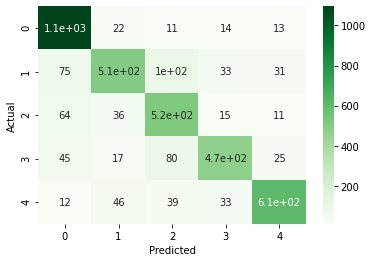

In [109]:
from sklearn import metrics
from sklearn.svm import SVC

model=SVC()
model.fit(X_train,y_train)
print(model)
# make predictions
y_predict=model.predict(X_test)


# summarize the fit of the model
print(metrics.accuracy_score(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap(pd.crosstab(y_test,y_predict,rownames=['Actual'],colnames=['Predicted']),cmap=plt.cm.Greens,annot=True)

In [113]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(X_train, y_train)  #Training our model
y_predict=clf.predict(X_test)  #testing our model
print("Accuracy:", accuracy_score(y_test, y_predict)) 

Accuracy: 0.9765605095541401


In [115]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(8)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(accuracy_score(y_predict,y_test))

0.9090445859872611


we can keep Random Forest Classifier since it has the best accuracy